In [1]:
import pandas as pd, numpy as np
import sklearn
import scipy.sparse
import warnings
warnings.filterwarnings('ignore')
from sklearn.feature_extraction.text import CountVectorizer
from scipy import sparse
from sklearn.metrics import confusion_matrix
from bs4 import BeautifulSoup
import re
from sklearn.metrics import f1_score
from sklearn.linear_model import LogisticRegression
from sklearn.feature_extraction.text import TfidfTransformer


In [2]:
train_data = pd.read_csv('../data/raw_data/train.csv')
test_data = pd.read_csv('../data/raw_data/test.csv')

train_labels=(train_data["Labels"])
test_labels = test_data["Labels"]

corpus_train = train_data["Comment"]
corpus_test = test_data["Comment"]

In [4]:
test_data.head()

,Comment,Labels
0,Thank you for understanding. I think very high...,0
1,:Dear god this site is horrible.,0
2,"""::: Somebody will invariably try to add Relig...",0
3,""" \n\n It says it right there that it IS a typ...",0
4,""" \n\n == Before adding a new product to the l...",0


In [5]:
from sklearn.pipeline import Pipeline
pipeline = Pipeline([
    ('cv', CountVectorizer(strip_accents='unicode',lowercase=True,stop_words='english', ngram_range=(1, 2))),
    ('clf', LogisticRegression(multi_class='ovr'))
])


In [6]:
from sklearn.metrics import make_scorer, roc_auc_score

from sklearn.model_selection import GridSearchCV
# tfidf_transformer = TfidfTransformer()
parameters = {'clf__penalty':('l1','l2', None), 'clf__class_weight':(None, 'balanced'), 'clf__solver':('newton-cg', 'lbfgs')}
grid = GridSearchCV(pipeline, parameters, scoring = make_scorer(roc_auc_score, average='macro'), cv=5, error_score=0.0, verbose=10)


In [ ]:
grid.fit(corpus_train, train_labels)

Fitting 5 folds for each of 12 candidates, totalling 60 fits
[CV] clf__class_weight=None, clf__penalty=l1, clf__solver=newton-cg ..


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  clf__class_weight=None, clf__penalty=l1, clf__solver=newton-cg, score=0.0, total=  32.6s
[CV] clf__class_weight=None, clf__penalty=l1, clf__solver=newton-cg ..


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   32.6s remaining:    0.0s


[CV]  clf__class_weight=None, clf__penalty=l1, clf__solver=newton-cg, score=0.0, total=  29.9s
[CV] clf__class_weight=None, clf__penalty=l1, clf__solver=newton-cg ..


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:  1.0min remaining:    0.0s


[CV]  clf__class_weight=None, clf__penalty=l1, clf__solver=newton-cg, score=0.0, total=  30.9s
[CV] clf__class_weight=None, clf__penalty=l1, clf__solver=newton-cg ..


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:  1.6min remaining:    0.0s


[CV]  clf__class_weight=None, clf__penalty=l1, clf__solver=newton-cg, score=0.0, total=  29.5s
[CV] clf__class_weight=None, clf__penalty=l1, clf__solver=newton-cg ..


[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:  2.1min remaining:    0.0s


[CV]  clf__class_weight=None, clf__penalty=l1, clf__solver=newton-cg, score=0.0, total=  33.5s


[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:  2.6min remaining:    0.0s


[CV] clf__class_weight=None, clf__penalty=l1, clf__solver=lbfgs ......
[CV]  clf__class_weight=None, clf__penalty=l1, clf__solver=lbfgs, score=0.0, total=  32.4s
[CV] clf__class_weight=None, clf__penalty=l1, clf__solver=lbfgs ......


[Parallel(n_jobs=1)]: Done   6 out of   6 | elapsed:  3.2min remaining:    0.0s


[CV]  clf__class_weight=None, clf__penalty=l1, clf__solver=lbfgs, score=0.0, total=  30.8s
[CV] clf__class_weight=None, clf__penalty=l1, clf__solver=lbfgs ......


[Parallel(n_jobs=1)]: Done   7 out of   7 | elapsed:  3.7min remaining:    0.0s


[CV]  clf__class_weight=None, clf__penalty=l1, clf__solver=lbfgs, score=0.0, total=  32.0s
[CV] clf__class_weight=None, clf__penalty=l1, clf__solver=lbfgs ......


[Parallel(n_jobs=1)]: Done   8 out of   8 | elapsed:  4.2min remaining:    0.0s


[CV]  clf__class_weight=None, clf__penalty=l1, clf__solver=lbfgs, score=0.0, total=  32.5s
[CV] clf__class_weight=None, clf__penalty=l1, clf__solver=lbfgs ......


[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:  4.8min remaining:    0.0s


[CV]  clf__class_weight=None, clf__penalty=l1, clf__solver=lbfgs, score=0.0, total=  30.2s
[CV] clf__class_weight=None, clf__penalty=l2, clf__solver=newton-cg ..
[CV]  clf__class_weight=None, clf__penalty=l2, clf__solver=newton-cg, score=0.8299833448255289, total=11.8min
[CV] clf__class_weight=None, clf__penalty=l2, clf__solver=newton-cg ..
[CV]  clf__class_weight=None, clf__penalty=l2, clf__solver=newton-cg, score=0.8320851226804683, total= 7.3min
[CV] clf__class_weight=None, clf__penalty=l2, clf__solver=newton-cg ..


In [7]:
grid.best_score_

0.76080052735964854

In [8]:
a = pd.DataFrame.from_dict(grid.cv_results_)
a

,mean_fit_time,mean_score_time,mean_test_score,mean_train_score,param_clf__class_weight,param_clf__penalty,param_clf__solver,params,rank_test_score,split0_test_score,...,split2_test_score,split2_train_score,split3_test_score,split3_train_score,split4_test_score,split4_train_score,std_fit_time,std_score_time,std_test_score,std_train_score
0,0.126878,0.000000,0.000000,0.000000,None,l1,newton-cg,"{'clf__class_weight': None, 'clf__penalty': 'l...",9,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.005123,0.000000,0.000000,0.000000
1,0.122108,0.000000,0.000000,0.000000,None,l1,lbfgs,"{'clf__class_weight': None, 'clf__penalty': 'l...",9,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.004195,0.000000,0.000000,0.000000
2,12.170704,0.030099,0.602469,0.728202,None,l1,liblinear,"{'clf__class_weight': None, 'clf__penalty': 'l...",8,0.578125,...,0.606735,0.726709,0.620543,0.754021,0.655817,0.761084,0.562364,0.000544,0.035830,0.026134
3,15.591796,0.027935,0.748731,0.909980,None,l2,newton-cg,"{'clf__class_weight': None, 'clf__penalty': 'l...",5,0.755214,...,0.756104,0.911711,0.745988,0.910371,0.742666,0.911294,0.956050,0.001205,0.005765,0.001472
4,2.844136,0.025706,0.749201,0.908791,None,l2,lbfgs,"{'clf__class_weight': None, 'clf__penalty': 'l...",4,0.755180,...,0.757808,0.911600,0.746821,0.906802,0.741379,0.909761,0.124904,0.000509,0.006259,0.001913
5,4.517600,0.027901,0.719302,0.795968,None,l2,liblinear,"{'clf__class_weight': None, 'clf__penalty': 'l...",6,0.710758,...,0.733929,0.803316,0.734076,0.820811,0.701439,0.773936,0.193719,0.003286,0.012909,0.023032
6,0.122431,0.000000,0.000000,0.000000,None,None,newton-cg,"{'clf__class_weight': None, 'clf__penalty': No...",9,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.004945,0.000000,0.000000,0.000000
7,0.119220,0.000000,0.000000,0.000000,None,None,lbfgs,"{'clf__class_weight': None, 'clf__penalty': No...",9,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.002178,0.000000,0.000000,0.000000
8,0.117854,0.000000,0.000000,0.000000,None,None,liblinear,"{'clf__class_weight': None, 'clf__penalty': No...",9,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.001395,0.000000,0.000000,0.000000
9,0.117963,0.000000,0.000000,0.000000,balanced,l1,newton-cg,"{'clf__class_weight': 'balanced', 'clf__penalt...",9,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.003009,0.000000,0.000000,0.000000


In [9]:
grid.best_estimator_

Pipeline(memory=None,
     steps=[('tfidf', TfidfTransformer(norm=None, smooth_idf=True, sublinear_tf=False,
         use_idf=False)), ('clf', LogisticRegression(C=1.0, class_weight='balanced', dual=False,
          fit_intercept=True, intercept_scaling=1, max_iter=100,
          multi_class='ovr', n_jobs=None, penalty='l2', random_state=None,
          solver='newton-cg', tol=0.0001, verbose=0, warm_start=False))])

In [41]:
from sklearn.metrics import roc_auc_score

def accuracy_plot(a):
    

    clf = LogisticRegression(C=1.0, class_weight=a['clf__class_weight'], dual=False,
              fit_intercept=True, intercept_scaling=1, max_iter=100,
              multi_class='ovr', n_jobs=None, penalty=a['clf__penalty'], random_state=None,
              solver=a['clf__solver'], tol=0.0001, verbose=0, warm_start=False)

    clf.fit(train_feature_vectors_sparse, train_labels)

    predictions = clf.predict(test_feature_vectors_sparse)
    confmat = confusion_matrix(test_labels, predictions)

    precision = confmat[1,1]/(confmat[1,1] + confmat[1,0])
    recall = confmat[1,1]/(confmat[1,1] + confmat[0,1])
    fScore = f1_score(test_labels, predictions, average='macro')
    ccr = (confmat[0,0] + confmat[1,1])/(sum(sum(confmat)))
    roc_auc = roc_auc_score(test_labels, predictions)
    print("Precision = ",precision)
    print("Recall = ",recall)
    print("F_score = ",fScore)
    print("CCR = ",ccr)
    print("ROC_AUC = ", roc_auc)
    print()
    print("Confusion Matrix: \n", confmat)
    print()
    return [precision,recall, fScore, ccr, roc_auc]

In [42]:
fsc = []
prec = []
recall = []
ccr = []
roc_auc = []
for i in range (1,6):
    ind = list((a["rank_test_score"] == i)).index(True)
    params = a['params'][ind]
    res = accuracy_plot(params)
    fsc.append(res[2])
    prec.append(res[0])
    recall.append(res[1])
    ccr.append(res[3])
    roc_auc.append(res[4])

Precision =  0.810739144846
Recall =  0.719094517125
F_score =  0.866726027733
CCR =  0.948749370489
ROC_AUC =  0.887521769076

Confusion Matrix: 
 [[51625  1911]
 [ 1142  4892]]

Precision =  0.814219423268
Recall =  0.717959959082
F_score =  0.86717707518
CCR =  0.948782944435
ROC_AUC =  0.889084457599

Confusion Matrix: 
 [[51606  1930]
 [ 1121  4913]]

Precision =  0.819522704674
Recall =  0.700127424607
F_score =  0.862446157434
CCR =  0.946164176599
ROC_AUC =  0.889980270448

Confusion Matrix: 
 [[51418  2118]
 [ 1089  4945]]

Precision =  0.682797480941
Recall =  0.864093959732
F_score =  0.869586743804
CCR =  0.956991774383
ROC_AUC =  0.83534673808

Confusion Matrix: 
 [[52888   648]
 [ 1914  4120]]

Precision =  0.681968843222
Recall =  0.863045302013
F_score =  0.869077714701
CCR =  0.95682390465
ROC_AUC =  0.834885721671

Confusion Matrix: 
 [[52883   653]
 [ 1919  4115]]



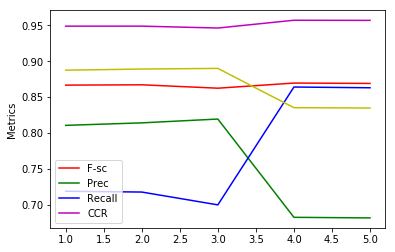

In [44]:
import matplotlib.pyplot as plt
plt.plot(np.arange(1, 6, 1), fsc, 'r', np.arange(1, 6, 1), prec, 'g', np.arange(1, 6, 1), recall, 'b', np.arange(1, 6, 1),ccr, 'm',np.arange(1, 6, 1),roc_auc, 'y')
plt.ylabel('Metrics')
plt.legend(('F-sc', 'Prec', 'Recall', 'CCR'), loc='lower left')
plt.show()



## Using liblinear solver

In [45]:
pipeline = Pipeline([
    ('tfidf', TfidfTransformer(norm=None, smooth_idf=True, sublinear_tf=False,use_idf=False)),
    ('clf', LogisticRegression(multi_class='ovr', solver='liblinear'))
])

parameters = {'clf__penalty':('l1','l2', None), 'clf__class_weight':(None, 'balanced')}
grid = GridSearchCV(pipeline, parameters, scoring = make_scorer(f1_score), cv=5, error_score=0.0, verbose=10)

grid.fit(train_feature_vectors_sparse, train_labels)

Fitting 5 folds for each of 6 candidates, totalling 30 fits
[CV] clf__class_weight=None, clf__penalty=l1 .........................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  clf__class_weight=None, clf__penalty=l1, score=0.6140189776553413, total=  12.3s
[CV] clf__class_weight=None, clf__penalty=l1 .........................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   12.3s remaining:    0.0s


[CV]  clf__class_weight=None, clf__penalty=l1, score=0.6013031337263418, total=  11.2s
[CV] clf__class_weight=None, clf__penalty=l1 .........................


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:   23.6s remaining:    0.0s


[CV]  clf__class_weight=None, clf__penalty=l1, score=0.6044799018103713, total=  11.4s
[CV] clf__class_weight=None, clf__penalty=l1 .........................


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:   35.0s remaining:    0.0s


[CV]  clf__class_weight=None, clf__penalty=l1, score=0.5965238981998758, total=  11.4s
[CV] clf__class_weight=None, clf__penalty=l1 .........................


[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:   46.5s remaining:    0.0s


[CV]  clf__class_weight=None, clf__penalty=l1, score=0.6326093606607526, total=  11.5s
[CV] clf__class_weight=None, clf__penalty=l2 .........................


[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:   58.0s remaining:    0.0s


[CV]  clf__class_weight=None, clf__penalty=l2, score=0.7107583774250441, total=   4.5s
[CV] clf__class_weight=None, clf__penalty=l2 .........................


[Parallel(n_jobs=1)]: Done   6 out of   6 | elapsed:  1.0min remaining:    0.0s


[CV]  clf__class_weight=None, clf__penalty=l2, score=0.7163059163059163, total=   4.9s
[CV] clf__class_weight=None, clf__penalty=l2 .........................


[Parallel(n_jobs=1)]: Done   7 out of   7 | elapsed:  1.1min remaining:    0.0s


[CV]  clf__class_weight=None, clf__penalty=l2, score=0.7339290861919862, total=   5.2s
[CV] clf__class_weight=None, clf__penalty=l2 .........................


[Parallel(n_jobs=1)]: Done   8 out of   8 | elapsed:  1.2min remaining:    0.0s


[CV]  clf__class_weight=None, clf__penalty=l2, score=0.7340759782919167, total=   7.8s
[CV] clf__class_weight=None, clf__penalty=l2 .........................


[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:  1.3min remaining:    0.0s


[CV]  clf__class_weight=None, clf__penalty=l2, score=0.7014388489208634, total=   5.5s
[CV] clf__class_weight=None, clf__penalty=None .......................
[CV]  clf__class_weight=None, clf__penalty=None, score=0.0, total=   0.1s
[CV] clf__class_weight=None, clf__penalty=None .......................
[CV]  clf__class_weight=None, clf__penalty=None, score=0.0, total=   0.1s
[CV] clf__class_weight=None, clf__penalty=None .......................
[CV]  clf__class_weight=None, clf__penalty=None, score=0.0, total=   0.1s
[CV] clf__class_weight=None, clf__penalty=None .......................
[CV]  clf__class_weight=None, clf__penalty=None, score=0.0, total=   0.1s
[CV] clf__class_weight=None, clf__penalty=None .......................
[CV]  clf__class_weight=None, clf__penalty=None, score=0.0, total=   0.1s
[CV] clf__class_weight=balanced, clf__penalty=l1 .....................
[CV]  clf__class_weight=balanced, clf__penalty=l1, score=0.6907430469074305, total=11.9min
[CV] clf__class_weight=bal

[Parallel(n_jobs=1)]: Done  30 out of  30 | elapsed: 66.1min finished


GridSearchCV(cv=5, error_score=0.0,
       estimator=Pipeline(memory=None,
     steps=[('tfidf', TfidfTransformer(norm=None, smooth_idf=True, sublinear_tf=False,
         use_idf=False)), ('clf', LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr',
          n_jobs=None, penalty='l2', random_state=None, solver='liblinear',
          tol=0.0001, verbose=0, warm_start=False))]),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'clf__penalty': ('l1', 'l2', None), 'clf__class_weight': (None, 'balanced')},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=make_scorer(f1_score), verbose=10)

In [46]:
grid.best_estimator_

Pipeline(memory=None,
     steps=[('tfidf', TfidfTransformer(norm=None, smooth_idf=True, sublinear_tf=False,
         use_idf=False)), ('clf', LogisticRegression(C=1.0, class_weight='balanced', dual=False,
          fit_intercept=True, intercept_scaling=1, max_iter=100,
          multi_class='ovr', n_jobs=None, penalty='l2', random_state=None,
          solver='liblinear', tol=0.0001, verbose=0, warm_start=False))])

In [52]:
clf = LogisticRegression(C=1.0, class_weight='balanced', dual=False,
          fit_intercept=True, intercept_scaling=1, max_iter=100,
          multi_class='ovr', n_jobs=None, penalty='l2', random_state=None,
          solver='liblinear', tol=0.0001, verbose=0, warm_start=False)

clf.fit(train_feature_vectors_sparse, train_labels)

predictions = clf.predict(test_feature_vectors_sparse)
confmat = confusion_matrix(test_labels, predictions)

precision = confmat[1,1]/(confmat[1,1] + confmat[1,0])
recall = confmat[1,1]/(confmat[1,1] + confmat[0,1])
fScore = f1_score(test_labels, predictions, average='macro')
ccr = (confmat[0,0] + confmat[1,1])/(sum(sum(confmat)))
roc_auc = roc_auc_score(test_labels, predictions)
print("Precision = ",precision)
print("Recall = ",recall)
print("F_score = ",fScore)
print("CCR = ",ccr)
print("ROC_AUC = ", roc_auc)
print()
print("Confusion Matrix: \n", confmat)
print()

Precision =  0.819522704674
Recall =  0.700127424607
F_score =  0.862446157434
CCR =  0.946164176599
ROC_AUC =  0.889980270448

Confusion Matrix: 
 [[51418  2118]
 [ 1089  4945]]

